# DTSC670: Foundations of Machine Learning Models

## Assignment 8: Polynomial Regression II

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details

The purpose of this assignment is expose you to a (second) polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_II.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_III.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_IV.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [53]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_II.csv`.

In [54]:
import pandas as pd

# import the csv data as df
fileName = "PolynomialRegressionData_II.csv"
df = pd.read_csv("PolynomialRegressionData_II.csv")
df

,x,y,z
0,-3.319120,-4.692237,-3397.468030
1,8.812980,9.128139,17492.040881
2,-19.995425,-19.149264,-169660.383385
3,-7.906697,-8.766213,-17145.826565
4,-14.129764,-13.779218,-63847.758980
...,...,...,...
145,-15.700235,-16.744824,-113760.620501
146,-10.971626,-8.920453,-18055.943866
147,8.519559,9.105221,17351.776523
148,2.388679,2.818205,-306.303994


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

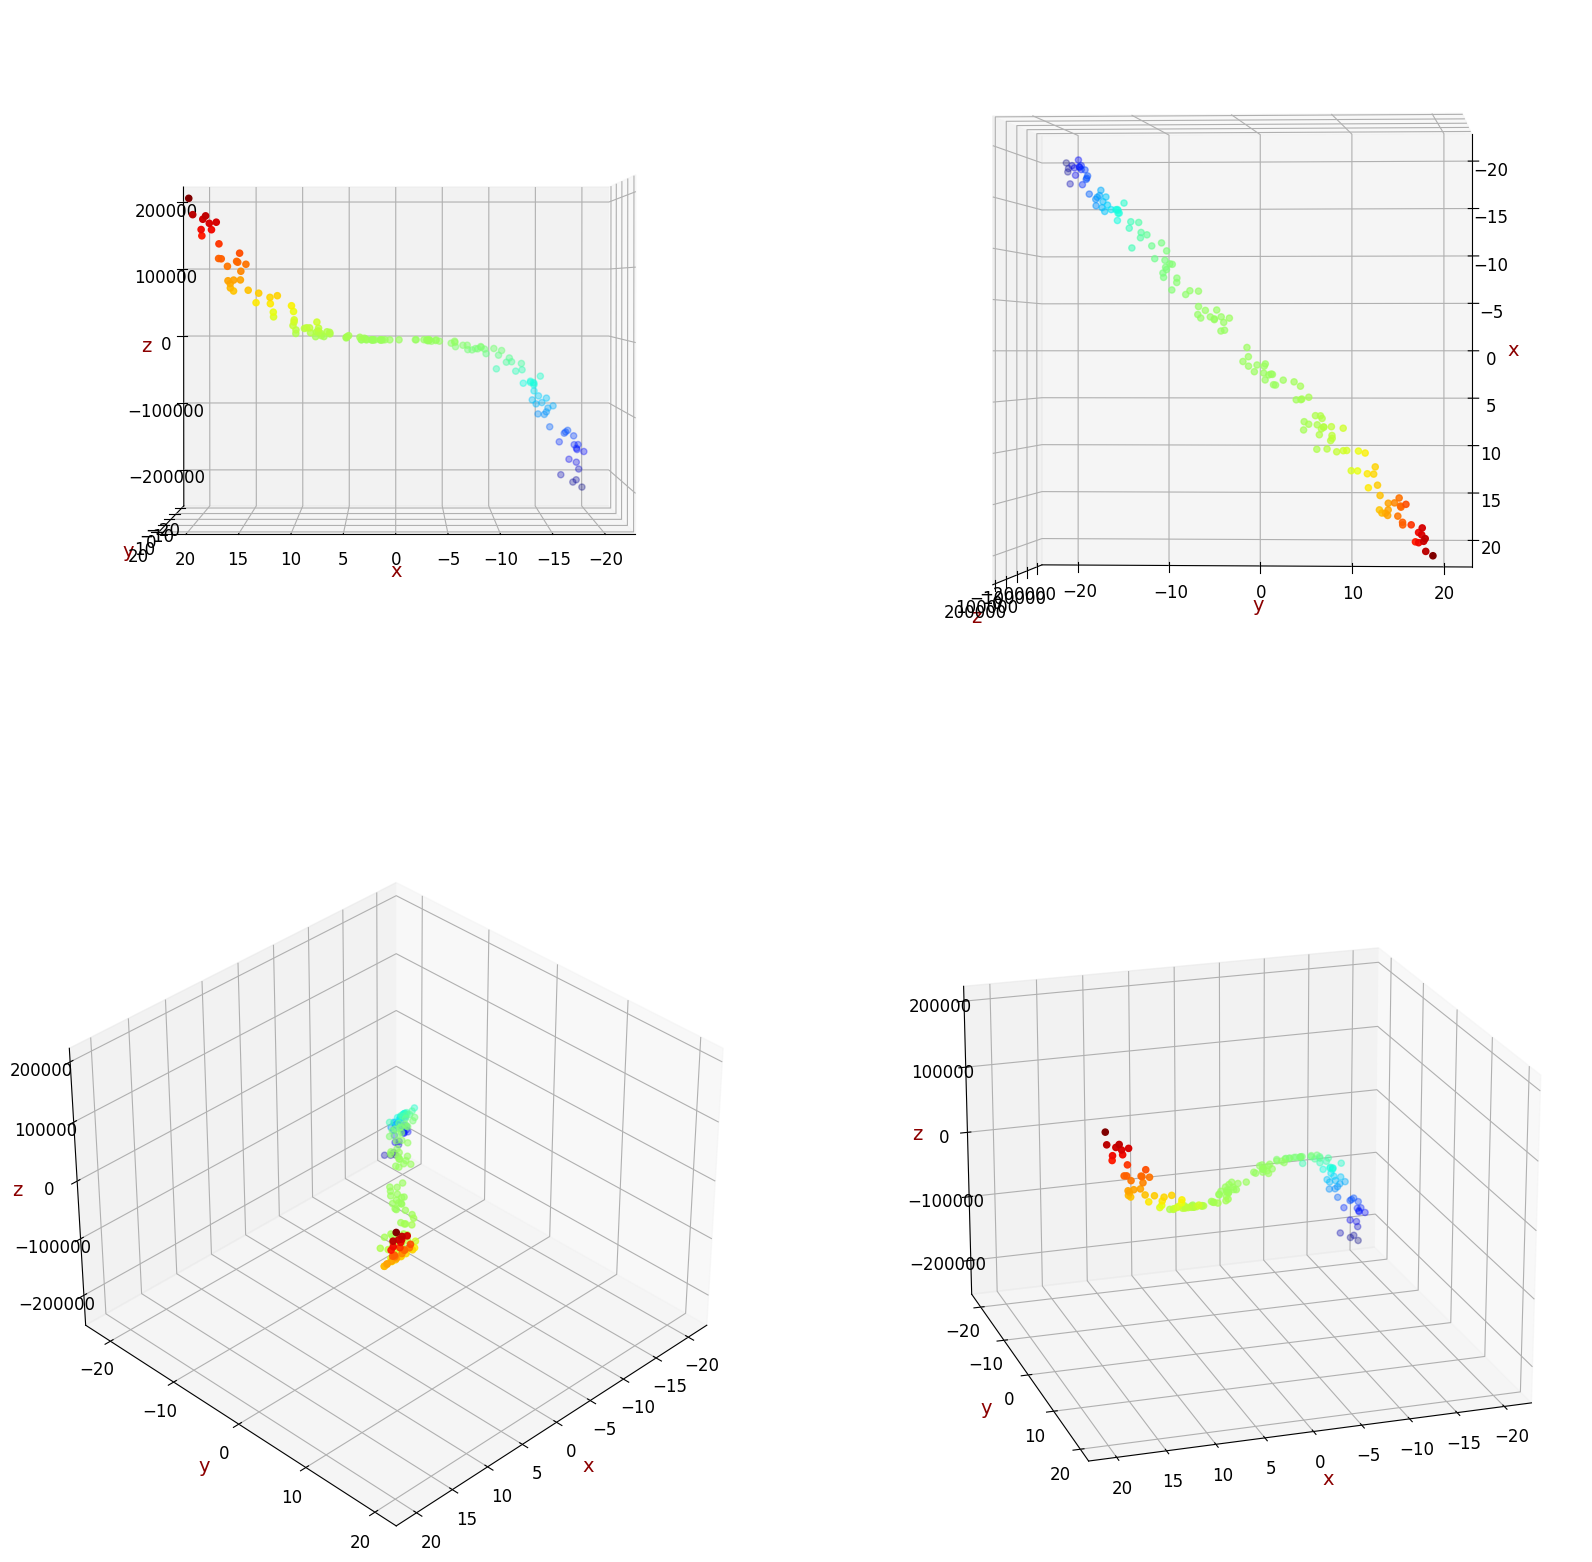

In [55]:
# plot the 4 images from different angles to show the shape of function.
figure = plt.figure(figsize=(20, 20))
N_ROWS = 2
N_COLS = 2

view_angles = [
    (1, 90, 0),
    (85, 90, 90),
    (35, 45, 0,),
    (20, 72, 0),
]


for i, view_angles in enumerate(view_angles):
    elevation, azimuth, roll = view_angles
    axes = figure.add_subplot(N_ROWS, N_COLS, i + 1, projection="3d")
    axes.scatter(df["x"], df["y"], df["z"], c=df["z"], cmap="jet")
    axes.set_xlabel("x")
    axes.set_ylabel("y")
    axes.set_zlabel("z")
    axes.xaxis.label.set_color('DarkRed')  
    axes.yaxis.label.set_color('DarkRed')
    axes.zaxis.label.set_color('DarkRed')
    axes.view_init(elev=elevation, azim=azimuth, roll=roll)

# Perform Polynomial Features Transformation
Perform a polynomial transformation on your features.

In [56]:
from sklearn.preprocessing import PolynomialFeatures

#get the independen variables together.
X = df.loc[:, ["x", "y"]]
#perform the polynomial transformation on the feature.
poly_feature = PolynomialFeatures(3)
X_poly = poly_feature.fit_transform(X)

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [57]:
#train the regression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, df["z"].values) 


In [58]:
#print coefficients and intercept.
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [ 0.         13.11049659 -0.12551237 -0.06438612  0.12522049 -0.06044106
 -0.03261149  0.1003747  -0.10273803 24.03500349]
Computed Model Intercept :  -875.0064816930189


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [59]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000).reshape(1000, 1)
y_fit = x_fit

X_new = np.append(x_fit, y_fit, axis=1)

X_new_poly = poly_feature.transform(X_new)

z_fit = model.predict(X_new_poly)

c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Recreate the first image, but plot the line of best fit in each of the subplots as well.

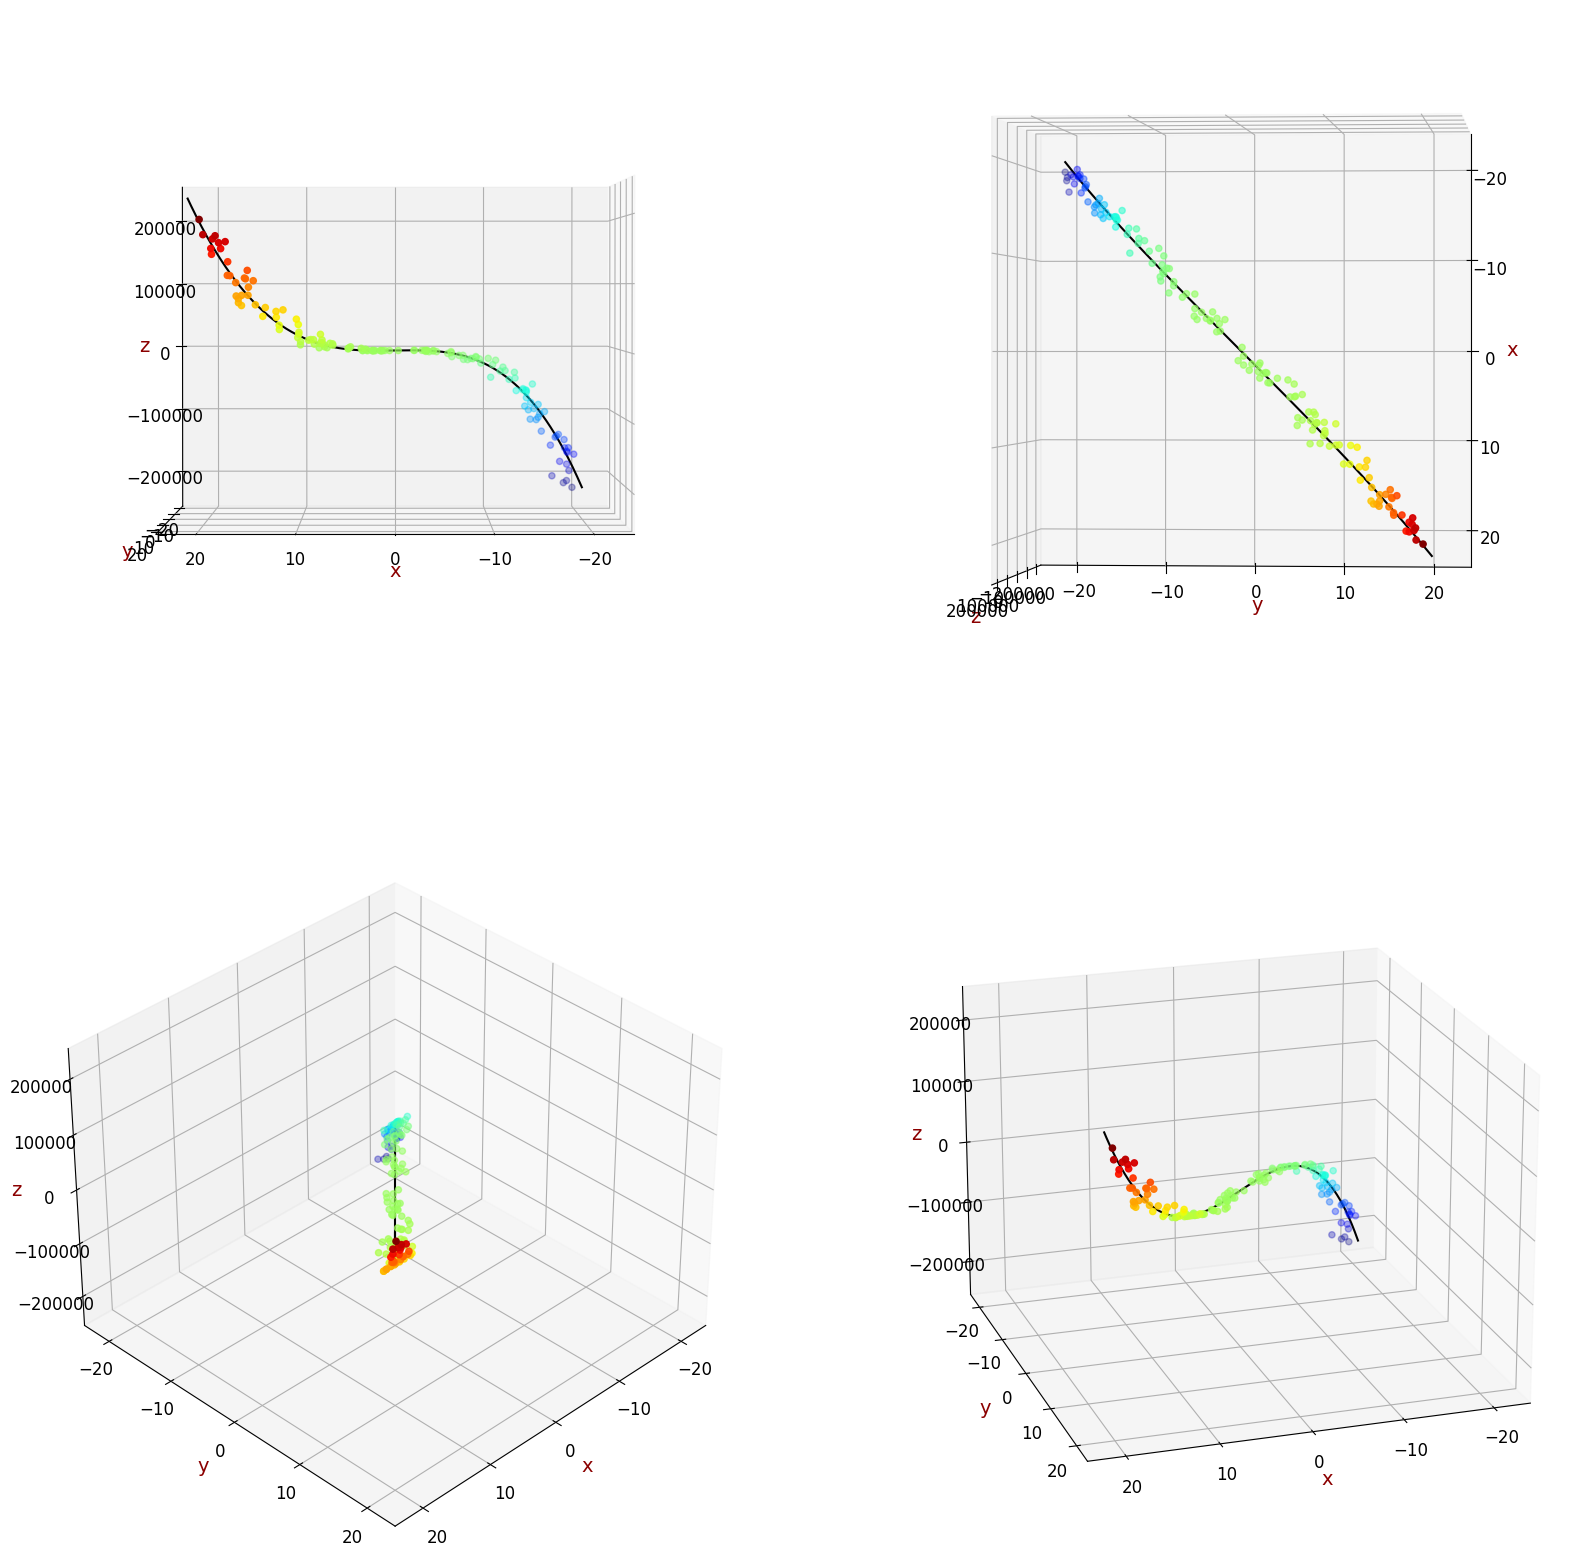

In [60]:
# plot the regrssion line against the data. Display from different angles.


figure = plt.figure(figsize=(20, 20))
N_ROWS = 2
N_COLS = 2

view_angles = [
    (1, 90, 0),
    (85, 90, 90),
    (35, 45, 0,),
    (20, 72, 0),
]

for i, view_angles in enumerate(view_angles):
    elevation, azimuth, roll = view_angles
    axes = figure.add_subplot(N_ROWS, N_COLS, i + 1, projection="3d")
    axes.scatter(df["x"], df["y"], df["z"], c=df["z"], cmap="jet")
    axes.plot3D(x_fit, y_fit, z_fit.reshape(1000,1), color='k')
    axes.set_xlabel("x")
    axes.set_ylabel("y")
    axes.set_zlabel("z") 
    axes.xaxis.label.set_color('DarkRed')  
    axes.yaxis.label.set_color('DarkRed')
    axes.zaxis.label.set_color('DarkRed')
    axes.view_init(elev=elevation, azim=azimuth, roll=roll)


# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` (this has been deprecated -- depending on your version of sklearn, you may need to use `get_feature_names_out()`) method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which which coefficient corresponds to which dependent variable of the model!  You may add more `print()` statements to accomplish this if you must.

In [61]:
# After visually inspecting the model coefficcients and intercept. Print the function of inferred true model.
print(poly_feature.get_feature_names())
print("True Model Coefficients: " , " 13, 0, 0, 0, 0, 0, 0, 0, 24 ")
print("True Model Intercept : ", "-875")
print("f(x0, x1) = -875 + 13*x0 + 0*x1  +0*x0^2, 0*x0 x1 + 0*x1^2 + 0*x0^3 + 0*x0^2 x1 + 0*x0 x1^2 + 24*x1^3")


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']
True Model Coefficients:   13, 0, 0, 0, 0, 0, 0, 0, 24 
True Model Intercept :  -875
f(x0, x1) = -875 + 13*x0 + 0*x1  +0*x0^2, 0*x0 x1 + 0*x1^2 + 0*x0^3 + 0*x0^2 x1 + 0*x0 x1^2 + 24*x1^3


c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
